In [3]:
from  torchvision import datasets
from  torchvision.transforms import ToTensor

In [4]:
train_data=datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)
test_data=datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:27<00:00, 359851.79it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159681.75it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:05<00:00, 322228.68it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4477210.05it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
# train_data.data.shape
train_data.data.size()

torch.Size([60000, 28, 28])

In [10]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [11]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [12]:
from torch.utils.data import DataLoader
dataloader={
    "train": DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    "test":DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1)
}

In [13]:
dataloader

{'train': <torch.utils.data.dataloader.DataLoader at 0x1fd72948390>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1fd72907ed0>}

In [15]:
import torch.nn as nn
import torch.nn.functional as F  
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv1=nn.Conv2d(1,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320,50)  # fully connected
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2)) 
        x=x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)

        return F.softmax(x)



In [16]:
import torch

In [19]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
device

device(type='cpu')

In [21]:
model=CNN().to(device)

In [23]:
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()
def train(epoch):
    model.train()
    for batch_index,(data,target) in enumerate(dataloader["train"]):
        data,target=data.to(device),target.to(device)
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_index % 20==0:
            print(f"train epoch: {epoch} [{batch_index * len(data)}/{len(dataloader['train'].dataset)} ({100. * batch_index / len(dataloader['train']):.0f}%)]\t{loss:.6f}")


def test():
    model.eval()
    test_loss=0
    correct=0
    with torch.no_grad():
        for data ,target in dataloader["test"]:
            data,target=data.to(device),target.to(device)
            output= model(data)
            test_loss +=loss_fn(output,target).item()
            pred=output.argmax(dim=-1,keepdim=True)
            correct+= pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(dataloader["test"].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(dataloader['test'].dataset)} ({100 * correct / len(dataloader['test'].dataset):.0f}%)\n")


In [24]:
for epoch in range(1,11):
    train(epoch)
    test()


C:\Users\user\AppData\Local\Temp\ipykernel_15200\3307860700.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


train epoch: 1 [0/60000 (0%)]	2.302612
train epoch: 1 [2000/60000 (3%)]	2.292022
train epoch: 1 [4000/60000 (7%)]	2.182149
train epoch: 1 [6000/60000 (10%)]	2.061021
train epoch: 1 [8000/60000 (13%)]	1.942664
train epoch: 1 [10000/60000 (17%)]	1.855855
train epoch: 1 [12000/60000 (20%)]	1.801574
train epoch: 1 [14000/60000 (23%)]	1.808984
train epoch: 1 [16000/60000 (27%)]	1.783171
train epoch: 1 [18000/60000 (30%)]	1.806563
train epoch: 1 [20000/60000 (33%)]	1.696466
train epoch: 1 [22000/60000 (37%)]	1.649105
train epoch: 1 [24000/60000 (40%)]	1.626374
train epoch: 1 [26000/60000 (43%)]	1.750425
train epoch: 1 [28000/60000 (47%)]	1.641076
train epoch: 1 [30000/60000 (50%)]	1.662446
train epoch: 1 [32000/60000 (53%)]	1.626713
train epoch: 1 [34000/60000 (57%)]	1.627544
train epoch: 1 [36000/60000 (60%)]	1.610174
train epoch: 1 [38000/60000 (63%)]	1.652673
train epoch: 1 [40000/60000 (67%)]	1.651115
train epoch: 1 [42000/60000 (70%)]	1.652807
train epoch: 1 [44000/60000 (73%)]	1.570729

In [25]:
device

device(type='cpu')

Prediction:5


C:\Users\user\AppData\Local\Temp\ipykernel_15200\3307860700.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


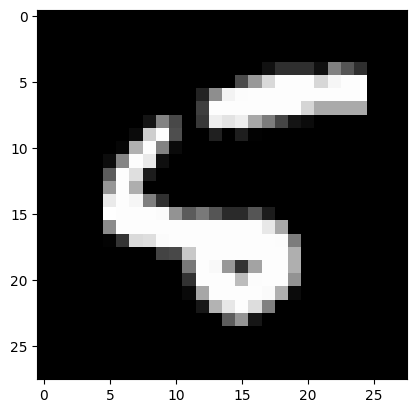

In [30]:
import matplotlib.pyplot as plt


model.eval()
data,target=test_data[8]
data=data.unsqueeze(0).to(device)
output=model(data)
prediction=output.argmax(dim=1,keepdim=True).item()
print(f"Prediction:{prediction}")
image=data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap="gray")
plt.show()